In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path = 'D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Training-dataset/'
valid_path = 'D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Test-Dataset/'

# add preprocessing layer to the front of VGG
mbnt = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:
import xlsxwriter
workbook = xlsxwriter.Workbook('D:/CatractImagesMobileNet/cataract/files/MobileNetCatractImagesAnalysis.xlsx')
worksheet1 = workbook.add_worksheet()
row=0
col=0
imageCount=0
worksheet1.write(row, 0, str("Analysis of Image"))
worksheet1.write(row, 1, str("Actual Object"))
worksheet1.write(row, 2, str("Percentage for Detected Object"))
worksheet1.write(row, 3, str("Detected Object"))
import os

row=1
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset"):
    for file in files:
        print(os.path.join(path, file))
        imageCount=imageCount + 1
        worksheet1.write(row, 0, str("Image-" + str(imageCount)))
        row=row+1
        

D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_061.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_062.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_063.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_064.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_065.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_066.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_067.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_068.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_069.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_070.png
D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Test-Dataset\glaucoma\Glaucoma_071.png
D:\Catract

In [4]:
imageCount

40

In [5]:
# don't train existing weights
for layer in mbnt.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of classes
folders = glob('D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Training-dataset/*')
print(len(folders))

2


In [7]:
# our layers - you can add more if you want
x = Flatten()(mbnt.output)
x = Dense(200, activation='relu')(x)
x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense(1, activation='sigmoid')(x)


In [8]:
# create a model object
model = Model(inputs=mbnt.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
  
training_set = train_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Training-dataset/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/CatractImagesMobileNet/cataract/GlaucomaDataset/Test-Dataset/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [12]:
import os
cats=[]
cat=[]
for path, currentDirectory, files in os.walk("D:\CatractImagesMobileNet\cataract\GlaucomaDataset\Training-dataset"):
    for file in files:
        #print(os.path.join(path, file))
        #print(file)
        cats=path.split("\\")
        cats=cats[len(cats)-1]
        if cats not in cat:
            cat.append(cats)
            print(cats)
cat.sort()
print(cat)

#images,cls = next(test_set)



glaucoma
normal
['glaucoma', 'normal']


In [13]:
#plt.imshow(images[3])
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [14]:
len(test_set)

2

In [20]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
3/3 [==============================] - 18s 6s/step - loss: 0.1756 - accuracy: 0.9500 - val_loss: 0.9606 - val_accuracy: 0.8000
Epoch 2/20
3/3 [==============================] - 16s 5s/step - loss: 0.0152 - accuracy: 0.9875 - val_loss: 1.7424 - val_accuracy: 0.7000
Epoch 3/20
3/3 [==============================] - 13s 4s/step - loss: 0.2317 - accuracy: 0.9500 - val_loss: 1.1228 - val_accuracy: 0.8000
Epoch 4/20
3/3 [==============================] - 14s 5s/step - loss: 0.0188 - accuracy: 0.9875 - val_loss: 1.6450 - val_accuracy: 0.7000
Epoch 5/20
3/3 [==============================] - 16s 5s/step - loss: 0.1371 - accuracy: 0.9500 - val_loss: 2.3027 - val_accuracy: 0.5750
Epoch 6/20
3/3 [==============================] - 17s 6s/step - loss: 0.1560 - accuracy: 0.9125 - val_loss: 1.3169 - val_accuracy: 0.7750
Epoch 7/20
3/3 [==============================] - 15s 5s/step - loss: 0.0892 - accuracy: 0.9750 - val_loss: 1.0633 - val_accuracy: 0.7750
Epoch 8/20
3/3 [==================

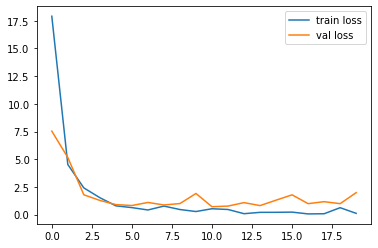

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

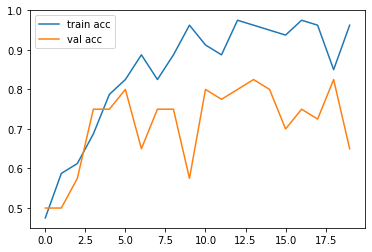

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [18]:
a, acc = model.evaluate(test_set)
print(acc)
print(a)

2/2 [==============================] - 1s 312ms/step - loss: 1.9845 - accuracy: 0.6500
0.6499999761581421
1.9844682216644287


In [28]:
model.save("D:/CatractImagesMobileNet/cataract/Mobile114Model.h4")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:/CatractImagesMobileNet/cataract/Mobile114Model.h4\assets


In [21]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\GlaucomaDataset\\Test-Dataset",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 40 images belonging to 2 classes.
[[2.79642493e-01 7.20357537e-01]
 [9.17692721e-01 8.23073164e-02]
 [9.99999285e-01 7.35101423e-07]
 [8.07221532e-01 1.92778468e-01]
 [9.98786747e-01 1.21329841e-03]
 [9.99646187e-01 3.53752577e-04]
 [6.83777258e-02 9.31622267e-01]
 [9.99998569e-01 1.40070460e-06]
 [2.60278910e-01 7.39721060e-01]
 [1.03405505e-01 8.96594465e-01]
 [1.54044883e-05 9.99984622e-01]
 [9.99739468e-01 2.60536704e-04]
 [9.99873519e-01 1.26523068e-04]
 [2.47766063e-01 7.52233922e-01]
 [1.00000000e+00 1.41577212e-08]
 [8.54140759e-01 1.45859212e-01]
 [9.99511003e-01 4.89012687e-04]
 [9.97862756e-01 2.13723467e-03]
 [9.54828113e-02 9.04517174e-01]
 [9.99994516e-01 5.52241681e-06]
 [9.99990344e-01 9.61432215e-06]
 [1.37162511e-04 9.99862790e-01]
 [8.03630706e-03 9.91963625e-01]
 [1.66202664e-01 8.33797336e-01]
 [9.99877453e-01 1.22501922e-04]
 [2.62482558e-07 9.99999762e-01]
 [9.99999881e-01 8.48439896e-08]
 [9.99999523e-01 4.53438247e-07]
 [9.99990582e-01 9.46049386e-06]
 [1

In [24]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CatractDataset\\TestG",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)
     

Found 1 images belonging to 2 classes.
[[9.999906e-01 9.459773e-06]]


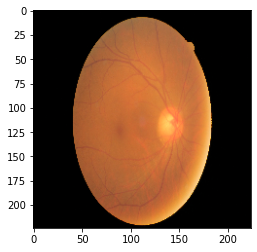

In [25]:
images,cls = next(test_set)
plt.imshow(images[0])

1 Actual: normal
File: glaucoma\Glaucoma_061.png
1predicted: normal
[0. 1.]
[0.3986419141292572, 0.6013581156730652]
1 Actual: normal
File: glaucoma\Glaucoma_062.png
0predicted: glaucoma
[0. 1.]
[0.7191030383110046, 0.28089696168899536]
0 Actual: glaucoma
File: glaucoma\Glaucoma_063.png
1predicted: normal
[1. 0.]
[0.0005508147878572345, 0.9994491934776306]
0 Actual: glaucoma
File: glaucoma\Glaucoma_064.png
1predicted: normal
[1. 0.]
[0.00011680311581585556, 0.9998831748962402]
0 Actual: glaucoma
File: glaucoma\Glaucoma_065.png
0predicted: glaucoma
[1. 0.]
[0.890227198600769, 0.10977286100387573]
1 Actual: normal
File: glaucoma\Glaucoma_066.png
1predicted: normal
[0. 1.]
[0.3043575584888458, 0.6956424117088318]
1 Actual: normal
File: glaucoma\Glaucoma_067.png
1predicted: normal
[0. 1.]
[0.4978525936603546, 0.5021474361419678]
0 Actual: glaucoma
File: glaucoma\Glaucoma_068.png
0predicted: glaucoma
[1. 0.]
[0.9926974177360535, 0.0073025948368012905]
1 Actual: normal
File: glaucoma\Glaucom

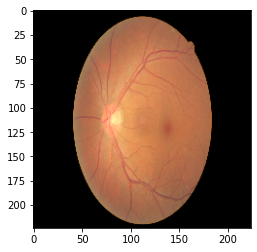

In [66]:
images,cls = next(test_set)
filename=test_set.filenames

#plt.imshow(images[0])
#print(cls[0])
#print(filename[0])
i=0
actual=[]
predicted=[]
for cl in cls:
    c=cl.tolist()
    max_value = max(c)
    max_index = c.index(max_value)
    print(str(max_index) + " Actual: " + cat[max_index])
    print("File: "  + filename[i])
    plt.imshow(images[i])
    actual.append(cat[max_index])
    
    pd=pred[i].tolist()
    m_value = max(pd)
    #print(max_value)
    m_index = pd.index(m_value)
    #print(max_index)
    print(str(m_index) + "predicted: " + cat[m_index])
    predicted.append(cat[m_index])
    print(cl)
    print(pd)
    plt.savefig('D:\\CatractImagesMobileNet\cataract\Predicted\Actual-' + str(cat[max_index]) + ' Predicted-' + str(cat[m_index])+ '-' + str(i) +'.png')
    i=i+1
    
#print(pd)
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()


[0. 1.]
glaucoma\Glaucoma_062.png


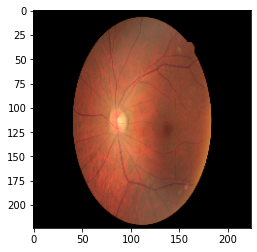

In [67]:
plt.imshow(images[1])
print(cls[1])
print(filename[1])


[1. 0.]
glaucoma\Glaucoma_063.png


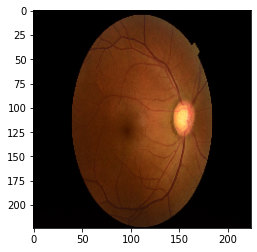

In [68]:
plt.imshow(images[2])
print(cls[2])
print(filename[2])

[1. 0.]
glaucoma\Glaucoma_064.png


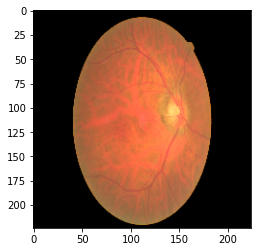

In [69]:
plt.imshow(images[3])
print(cls[3])
print(filename[3])

In [70]:
actual

['normal',
 'normal',
 'glaucoma',
 'glaucoma',
 'glaucoma',
 'normal',
 'normal',
 'glaucoma',
 'normal',
 'glaucoma',
 'glaucoma',
 'normal',
 'normal',
 'normal',
 'glaucoma',
 'glaucoma',
 'glaucoma',
 'glaucoma',
 'normal',
 'normal',
 'glaucoma',
 'glaucoma',
 'normal',
 'normal',
 'glaucoma',
 'glaucoma',
 'glaucoma',
 'normal',
 'glaucoma',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'glaucoma',
 'glaucoma',
 'glaucoma',
 'normal',
 'glaucoma',
 'normal']

In [71]:
predicted=[]
pre=pred.tolist()
for pd in pre:
    max_value = max(pd)
    print(pd)
    #print(max_value)
    max_index = pd.index(max_value)
    #print(max_index)
    print(str(max_index) + "predicted: " + cat[max_index])
    predicted.append(cat[max_index])

[0.3986419141292572, 0.6013581156730652]
1predicted: normal
[0.7191030383110046, 0.28089696168899536]
0predicted: glaucoma
[0.0005508147878572345, 0.9994491934776306]
1predicted: normal
[0.00011680311581585556, 0.9998831748962402]
1predicted: normal
[0.890227198600769, 0.10977286100387573]
0predicted: glaucoma
[0.3043575584888458, 0.6956424117088318]
1predicted: normal
[0.4978525936603546, 0.5021474361419678]
1predicted: normal
[0.9926974177360535, 0.0073025948368012905]
0predicted: glaucoma
[0.9848944544792175, 0.015105538070201874]
0predicted: glaucoma
[0.993445634841919, 0.006554343272000551]
0predicted: glaucoma
[0.9986295700073242, 0.0013704252196475863]
0predicted: glaucoma
[0.03378402814269066, 0.966215968132019]
1predicted: normal
[0.9699144959449768, 0.03008555807173252]
0predicted: glaucoma
[0.9521334767341614, 0.04786653071641922]
0predicted: glaucoma
[0.9989331364631653, 0.00106683315243572]
0predicted: glaucoma
[0.02682921290397644, 0.973170816898346]
1predicted: normal
[0

In [72]:
len(actual)

40

In [73]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

    glaucoma       0.50      0.45      0.47        20
      normal       0.50      0.55      0.52        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



In [208]:
#for file in test_set.filenames:
 #   print(file)

In [210]:


#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [20]:
#for t in test_set:
 #   print(t)

In [24]:
actual=[]
img=1
row=1
for i in range(int(imageCount/8)):
    images,cls = next(test_set)
    print(len(cls))
    #print("In in first batch at 3")
    j=0
    for c in cls:
        cl=c.tolist()
        m_value = max(cl)
        m_index = cl.index(m_value)
        print("Index" + str(m_index))
        print("Actual: " + cat[m_index])
        print("class", cl)
        actual.append(cat[m_index])
        worksheet1.write(row, 1, str(cat[m_index]))
        
        #plt.imshow(images[j])
        #plt.savefig("D:\\ImagesForCocoAssesment\\MobileNet\\TagsForInputImagesGeneratedByProgram\\" + str(img) + "-" + str(cat[m_index]) + ".png")
        img=img+1
        j=j+1
        row=row+1
    i=i+1
 


32
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.

In [72]:
workbook.close()    
    

C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [227]:
actual

['cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'c

              precision    recall  f1-score   support

    cataract       1.00      1.00      1.00         2
      normal       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



32